**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [6]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
%load_ext pycodestyle_magic

In [83]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):
    def __init__(self, n_neighbors):
        self.__numNeighbors = n_neighbors

    def fit(self, X, y):
        self.__X = X.astype(np.float64)
        self.__y = y.astype(int)
        self.__numOfClasses = int(np.amax(y)) + 1

    def pairwise_distances(self, Y):
        X_sqs = (self.__X ** 2).sum(axis=1)
        Y_sqs = (Y ** 2).sum(axis=1)
        XY = self.__X.dot(Y.T)
        D = -2 * XY + Y_sqs + X_sqs.reshape(-1, 1)
        return np.sqrt(D)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def predict_proba(self, X):
        distances = self.pairwise_distances(X.astype(np.float64)).T
        indices = np.argpartition(distances, self.__numNeighbors, axis=1)
        indices = indices[:, :self.__numNeighbors]
        ans = self.__y[indices][:, np.newaxis, :]
        rng = np.arange(self.__numOfClasses)[np.newaxis, :, np.newaxis]
        count = np.sum(ans == rng, axis=2).astype(np.float64)
        return count / self.__numNeighbors

    def score(self, X, y):
        prediction = self.predict(X)
        return 1.0 - float(np.count_nonzero(prediction - y)) / y.shape[0]

**IRIS**

In [89]:
iris = datasets.load_iris()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [91]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [92]:
%time clf.fit(X_train, y_train)

CPU times: user 1.22 ms, sys: 1.95 ms, total: 3.17 ms
Wall time: 4.42 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [93]:
%time my_clf.fit(X_train, y_train)

CPU times: user 71 µs, sys: 38 µs, total: 109 µs
Wall time: 91.8 µs


In [94]:
%time clf.predict(X_test)

CPU times: user 1.78 ms, sys: 2.34 ms, total: 4.12 ms
Wall time: 2.88 ms


array([1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2])

In [95]:
%time my_clf.predict(X_test)

CPU times: user 1.06 ms, sys: 1.23 ms, total: 2.29 ms
Wall time: 1.41 ms


array([1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2])

In [96]:
%time clf.predict_proba(X_test)

CPU times: user 1.01 ms, sys: 655 µs, total: 1.66 ms
Wall time: 1.03 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [97]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.3 ms, sys: 942 µs, total: 2.24 ms
Wall time: 1.23 ms


array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [98]:
clf.score(X_test, y_test)

1.0

In [99]:
my_clf.score(X_test, y_test)

1.0

/Users/Sam/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


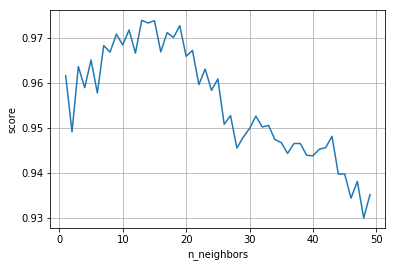

In [100]:
# %%pycodestyle
# Задание 3
# optimal n_neighbors ~ 15
iris = datasets.load_iris()
ns = range(1, 50)
num_iters = 1000
scores = []
for i in ns:
    score_sum = 0.0
    for j in range(num_iters):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size=0.1, stratify=iris.target)
        knn = MyKNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        score_sum += knn.score(X_test, y_test)
    scores.append(score_sum / num_iters)
plt.plot(ns, scores)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.grid(True)
plt.show()

# на 2м питоне отрабатывало без ошибок, 3 питон нужен ради pycodestyle_magic

**MNIST**

In [46]:
mnist = fetch_mldata('MNIST original')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [72]:
clf = KNeighborsClassifier(n_neighbors=2)

In [73]:
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [74]:
%time clf.fit(X_train, y_train)

CPU times: user 31 s, sys: 470 ms, total: 31.4 s
Wall time: 31.8 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [75]:
%time my_clf.fit(X_train, y_train)

CPU times: user 125 ms, sys: 173 ms, total: 298 ms
Wall time: 303 ms


In [76]:
%time clf.predict(X_test)

CPU times: user 9min 41s, sys: 3.72 s, total: 9min 44s
Wall time: 10min 1s


array([8., 5., 7., ..., 3., 4., 7.])

In [77]:
%time my_clf.predict(X_test)

CPU times: user 42.4 s, sys: 38.9 s, total: 1min 21s
Wall time: 1min 27s


array([8, 5, 7, ..., 3, 4, 7])

In [78]:
%time clf.predict_proba(X_test)

CPU times: user 8min 52s, sys: 964 ms, total: 8min 53s
Wall time: 8min 53s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [79]:
%time my_clf.predict_proba(X_test)

CPU times: user 39.8 s, sys: 36.5 s, total: 1min 16s
Wall time: 1min 22s


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [80]:
clf.score(X_test, y_test)

0.9658571428571429

In [81]:
my_clf.score(X_test, y_test)

0.9658571428571429

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных, основана на matplotlib, позволяет рисовать различные крутые графики
# matplotlib - построение графиков а-ля матлаб
# train_test_split - функция для разделения выборки на обучающую и валидационную части
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - пайплайн, позволяет объединить начальную подготовку
# данных и обучение модели
# StandardScaler (from sklearn.preprocessing import StandardScaler) - преобразование данных, после которого среднее
# значение становится равно 0, а стандартное отклонение -1
# ClassifierMixin - предоставляет интерфейс для метода score. Метод возвращает долю верно предсказанных классов
# на данных с известными классами. Используется во всех классификаторах Sklearn
# NeighborsBase - базовый класс для KNeighborsClassifier
# KNeighborsMixin - миксин содержащий метод поиска k ближайших соседей (метод kneighbors)
# SupervisedIntegerMixin - содержит метод fit